In [1]:
import Diagrams.Backend.Cairo.CmdLine

In [5]:
{-# LANGUAGE NoMonomorphismRestriction FlexibleContexts TypeFamilies #-}
import Diagrams.Prelude hiding (tri)
import Data.Colour.SRGB (sRGB24read)

The standard infinite list of Fibonacci numbers.



In [3]:
fibs :: [Int]
fibs = 0 : 1 : zipWith (+) fibs (tail fibs)

Create a grid by gluing together a bunch of squares.



In [6]:
grid :: Int -> Int -> Diagram B
grid x y = frame <> lattice
  where s       = unitSquare # lw thin
        frame   = rect (fromIntegral x) (fromIntegral y)
                # lw thick
        lattice = centerXY . vcat . map hcat . replicate y . replicate x $ s

Line 6: Redundant map
Found:
map hcat . replicate y . replicate x
Why not:
replicate y . hcat . replicate x

The trapezoid and triangle shapes, with sides lengths based on two
Fibonacci numbers.



In [8]:
trap, tri :: Double -> Double -> Diagram B
trap s1 s2 = lw none . strokeLoop . closeLine
           . fromOffsets . map r2 $ [(0,-s2), (s2,0), (0,s1)]
tri s1 s2  = lw none .  strokeLoop . closeLine
           . fromOffsets . map r2 $ [(s1,0), (0,s1+s2)]

Draw the paradox diagram based on the nth Fibonacci number.



In [13]:
paradox :: Int -> Bool -> Diagram B
paradox n drawDiags = (sq # rotateBy (1/4)
                   ||| strutX (s2 / 2)
                   ||| rect # rotateBy (1/4)) # centerXY
  where f1 = fibs !! n
        f2 = fibs !! (n+1)
        s1 = fromIntegral f1
        s2 = fromIntegral f2

        trap1 = trap s1 s2 # fc (sRGB24read "#BEC3C7")
        trap2 = trap s1 s2 # fc (sRGB24read "#1ABC9C")
                           # rotateBy (1/2)

        tri1  = tri s1 s2  # fc (sRGB24read "#FF6666")
        tri2  = tri s1 s2  # fc (sRGB24read "#37485D")

        -- The four shapes assembled into a square.

        sq = (if drawDiags then sqDiags else mempty)
             <> grid (f1+f2) (f1+f2)
             <> sqShapes
        sqDiags = (fromVertices [p2 (0,s2), p2 (s2,s1)] <>
                   fromVertices [p2 (s2,0), p2 (s2,s1+s2)] <>
                   fromVertices [p2 (s2,0), p2 (s1+s2,s1+s2)])
                # strokeP
                # lw thick
                # centerXY

        sqShapes = (traps # centerY ||| tris # centerY)
                 # centerXY
        traps = trap2 # alignL
                      # translateY (s1 - s2)
             <> trap1
        tris  = tri1 # alignBL
             <> tri2 # rotateBy (1/2)
                     # alignBL

        -- The four shapes assembled into a rectangle.

        rect = (if drawDiags then rDiags else mempty)
               <> grid (2*f2 + f1) f2
               <> rShapes

        rShapes = (bot # alignTL <> top # alignTL) # centerXY
        bot = trap1 # alignB ||| rotateBy (-1/4) tri1 # alignB
        top = rotateBy (1/4) tri2 # alignT ||| trap2 # alignT

        rDiags = (fromVertices [p2 (0,s2), p2 (2*s2+s1, 0)] <>
                  fromVertices [p2 (s2,0), p2 (s2,s1)] <>
                  fromVertices [p2 (s1+s2,s2-s1), p2 (s1+s2,s2)]
                  )
                 # strokeP
                 # lw thick
                 # lineCap LineCapRound
                 # centerXY


Draw the order-4 diagram with thick lines in the middle. Passing the
argument `False` causes the thick lines to be omitted, revealing the
skinny gap in the rectangular assembly.  Lower-order diagrams make the
gap more obvious; higher-order diagrams make it increasingly less
obvious (but make the grid smaller).



In [14]:
example = paradox 4 True # frame 0.5

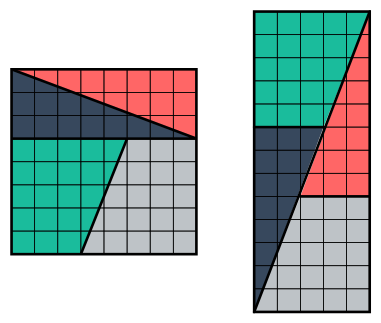

In [16]:
diagram example